In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
#Import Data
df_IncomeByZipCode = pd.read_csv('/content/drive/MyDrive/Hackathon/IRSIncomeByZipCode.csv', index_col=0, header=0)
df_ServiceApp = pd.read_csv('/content/drive/MyDrive/Hackathon/Service Application Data/service_app.csv', index_col=0, header=0)
df_project_cost = pd.read_csv('/content/drive/MyDrive/Hackathon/Service Application Data/project_cost.csv', index_col=0, header=0)

#How Many Services we have done?

In [94]:
df = df_ServiceApp.copy()
df['State'] = df['State'].astype(str).str.strip().str.upper()
df['County2'] = df['County2'].astype(str).str.strip().str.lower()

# Filter to TN + Davidson County
tn_davidson = df[(df['State'] == 'TN') & (df['County2'] == 'davidson')]

# How many services (rows) were done there?
services_done_count = len(tn_davidson)
print("Services done in TN, Davidson County (row count):", services_done_count)

Services done in TN, Davidson County (row count): 317


#What type of ZipCode do we have in TN, Davidson



In [95]:
df_IncomeByZipCode.head()

,STATE,ZIPCODE,Number of returns,Adjusted gross income (AGI),Avg AGI,Number of returns with total income,Total income amount,Avg total income,Number of returns with taxable income,Taxable income amount,Avg taxable income
index,,,,,,,,,,,
0,AL,0,2022380,105089761,51.963410,2022380,106420533,52.621433,1468370,67850874,46.208295
1,AL,35004,4930,255534,51.832454,4930,258024,52.337525,4020,163859,40.760945
2,AL,35005,3300,128387,38.905152,3300,129390,39.209091,2440,70760,29.000000
3,AL,35006,1230,58302,47.400000,1230,58585,47.630081,940,36341,38.660638
4,AL,35007,11990,643708,53.687073,11990,651350,54.324437,9280,414878,44.706681


In [96]:
df_ZipCode = df_IncomeByZipCode[['STATE', 'ZIPCODE']]

In [97]:
df_ZipCode.head()

,STATE,ZIPCODE
index,,
0,AL,0
1,AL,35004
2,AL,35005
3,AL,35006
4,AL,35007


In [98]:
df_ZipCodeServiceApp = pd.merge(df_ZipCode, df_ServiceApp, left_on='ZIPCODE', right_on='Zip', how='inner')

In [99]:
display(df_ZipCodeServiceApp)

,STATE,ZIPCODE,RecordType,CreatedDate,Account,Area_Median_Income,County2,Current_Program_Operating_Budget_Amount,Date_of_Application,Date_of_Closure,...,Target_Community,Lien_Release_Date,Incomplete_Impact_Summaries,Total_Project_Costs,Assessed_Property_Value,City,State,Zip,masked_lat,masked_lon
0,DC,20002,Homeowner,2022-12-05 18:43:28,acc_2727,NaN,NaN,NaN,2022-12-05 00:00:00,NaN,...,NaN,NaN,0,0.0,NaN,Wasington,DC,20002.0,38.902941,-77.015637
1,TN,37013,Homeowner,2018-04-03 15:57:09,acc_1609,NaN,Davidson,NaN,2018-04-02 00:00:00,2018-11-02 00:00:00,...,NaN,NaN,0,0.0,NaN,Nashville,TN,37013.0,36.060735,-86.620821
2,TN,37013,Homeowner,2018-04-24 15:51:31,acc_1633,NaN,Davidson,NaN,2018-04-05 00:00:00,2018-10-03 00:00:00,...,NaN,NaN,0,0.0,NaN,Nashville,TN,37013.0,36.074536,-86.618530
3,TN,37013,Homeowner,2022-01-17 17:32:53,acc_2360,area_median_income_5,Davidson,NaN,2021-09-23 00:00:00,2021-12-14 00:00:00,...,NaN,NaN,0,0.0,NaN,Antioch,TN,37013.0,36.055030,-86.661484
4,TN,37013,Homeowner,2025-08-29 16:13:05,acc_3726,area_median_income_30,Davidson,NaN,2025-08-26 00:00:00,NaN,...,NaN,NaN,0,NaN,242200.0,Nashville,TN,37013.0,36.051233,-86.695617
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,TN,37218,Homeowner,2025-06-04 20:30:43,acc_3690,NaN,Davidson,NaN,2025-06-04 00:00:00,NaN,...,Bordeaux,NaN,11,0.0,221800.0,Nashville,TN,37218.0,36.204709,-86.844899
333,TN,37218,Homeowner,2025-06-09 16:06:55,acc_3698,NaN,Davidson,NaN,2025-06-05 00:00:00,NaN,...,NaN,NaN,0,0.0,229400.0,Nashville,TN,37218.0,36.230363,-86.832368
334,TN,37218,Homeowner,2025-07-15 17:01:41,acc_3692,area_median_income_30,Davidson,NaN,2025-05-09 00:00:00,NaN,...,Bordeaux,NaN,0,0.0,235100.0,Nashville,TN,37218.0,36.225828,-86.832822
335,TN,37218,Homeowner,2025-09-11 16:35:16,acc_3033,NaN,NaN,NaN,2025-09-11 00:00:00,NaN,...,NaN,NaN,0,NaN,NaN,Nashville,TN,37218.0,36.229895,-86.821396


In [100]:
# See unique states
print(df_ZipCodeServiceApp['State'].unique())

['DC' 'TN']


In [101]:
#Drop other States
df_TN = df_ZipCodeServiceApp[df_ZipCodeServiceApp['State'] == 'TN']

In [102]:
print(df_TN['State'].unique())

['TN']


In [103]:
display(df_TN)

,STATE,ZIPCODE,RecordType,CreatedDate,Account,Area_Median_Income,County2,Current_Program_Operating_Budget_Amount,Date_of_Application,Date_of_Closure,...,Target_Community,Lien_Release_Date,Incomplete_Impact_Summaries,Total_Project_Costs,Assessed_Property_Value,City,State,Zip,masked_lat,masked_lon
1,TN,37013,Homeowner,2018-04-03 15:57:09,acc_1609,NaN,Davidson,NaN,2018-04-02 00:00:00,2018-11-02 00:00:00,...,NaN,NaN,0,0.0,NaN,Nashville,TN,37013.0,36.060735,-86.620821
2,TN,37013,Homeowner,2018-04-24 15:51:31,acc_1633,NaN,Davidson,NaN,2018-04-05 00:00:00,2018-10-03 00:00:00,...,NaN,NaN,0,0.0,NaN,Nashville,TN,37013.0,36.074536,-86.618530
3,TN,37013,Homeowner,2022-01-17 17:32:53,acc_2360,area_median_income_5,Davidson,NaN,2021-09-23 00:00:00,2021-12-14 00:00:00,...,NaN,NaN,0,0.0,NaN,Antioch,TN,37013.0,36.055030,-86.661484
4,TN,37013,Homeowner,2025-08-29 16:13:05,acc_3726,area_median_income_30,Davidson,NaN,2025-08-26 00:00:00,NaN,...,NaN,NaN,0,NaN,242200.0,Nashville,TN,37013.0,36.051233,-86.695617
5,TN,37042,Homeowner,2019-08-03 03:00:07,acc_116,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0.0,NaN,Clarksville,TN,37042.0,36.577292,-87.405351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
332,TN,37218,Homeowner,2025-06-04 20:30:43,acc_3690,NaN,Davidson,NaN,2025-06-04 00:00:00,NaN,...,Bordeaux,NaN,11,0.0,221800.0,Nashville,TN,37218.0,36.204709,-86.844899
333,TN,37218,Homeowner,2025-06-09 16:06:55,acc_3698,NaN,Davidson,NaN,2025-06-05 00:00:00,NaN,...,NaN,NaN,0,0.0,229400.0,Nashville,TN,37218.0,36.230363,-86.832368
334,TN,37218,Homeowner,2025-07-15 17:01:41,acc_3692,area_median_income_30,Davidson,NaN,2025-05-09 00:00:00,NaN,...,Bordeaux,NaN,0,0.0,235100.0,Nashville,TN,37218.0,36.225828,-86.832822
335,TN,37218,Homeowner,2025-09-11 16:35:16,acc_3033,NaN,NaN,NaN,2025-09-11 00:00:00,NaN,...,NaN,NaN,0,NaN,NaN,Nashville,TN,37218.0,36.229895,-86.821396


In [104]:
print(df_TN['ZIPCODE'].unique())

[37013 37042 37043 37064 37072 37076 37115 37189 37204 37206 37207 37208
 37209 37210 37211 37214 37216 37217 37218]


#Number of Services by Year

In [110]:
df = df_ServiceApp.copy()

# 1) Normalize text fields
df['State'] = df['State'].astype(str).str.strip().str.upper()
df['County2'] = df['County2'].astype(str).str.strip().str.lower()


In [111]:
# 2) Identify a date column (pick the first that exists
possible_date_cols = [
    'ServiceDate', 'Service_Date', 'Date', 'CreatedDate', 'CompletedDate', 'Created_At'
]
date_col = next((c for c in possible_date_cols if c in df.columns), None)
if date_col is None:
    raise ValueError("No date column found. Add your date column name to 'possible_date_cols'.")

# Convert the date column to datetime objects
df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

# Drop rows with invalid dates after conversion
df = df.dropna(subset=[date_col])

In [112]:
# --- 3) Filter to TN + Davidson County ---
tn_davidson = df[(df['State'] == 'TN') & (df['County2'] == 'davidson')].copy()

# --- 4) Count by year ---
tn_davidson['Year'] = tn_davidson[date_col].dt.year


In [113]:
# A) Distinct services by ID (recommended since you have an ID column)
services_by_year_unique = (
    tn_davidson.groupby('Year').apply(lambda x: x.index.nunique())
    .sort_index()
    .rename('Unique_Service_Count')
)

# B) Plain row counts (if each row equals one service completion)
services_by_year_rows = (
    tn_davidson.groupby('Year').size()
    .sort_index()
    .rename('Row_Count')
)

print("Unique services (by ID) per year in Davidson, TN:")
display(services_by_year_unique)

print("\nRow count per year in Davidson, TN (if each row = a service):")
display(services_by_year_rows)

Unique services (by ID) per year in Davidson, TN:


/tmp/ipython-input-4073966154.py:3: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



,Unique_Service_Count
Year,
2018,51
2019,29
2020,27
2021,24
2022,30
2023,36
2024,54
2025,66



Row count per year in Davidson, TN (if each row = a service):


,Row_Count
Year,
2018,51
2019,29
2020,27
2021,24
2022,30
2023,36
2024,54
2025,66


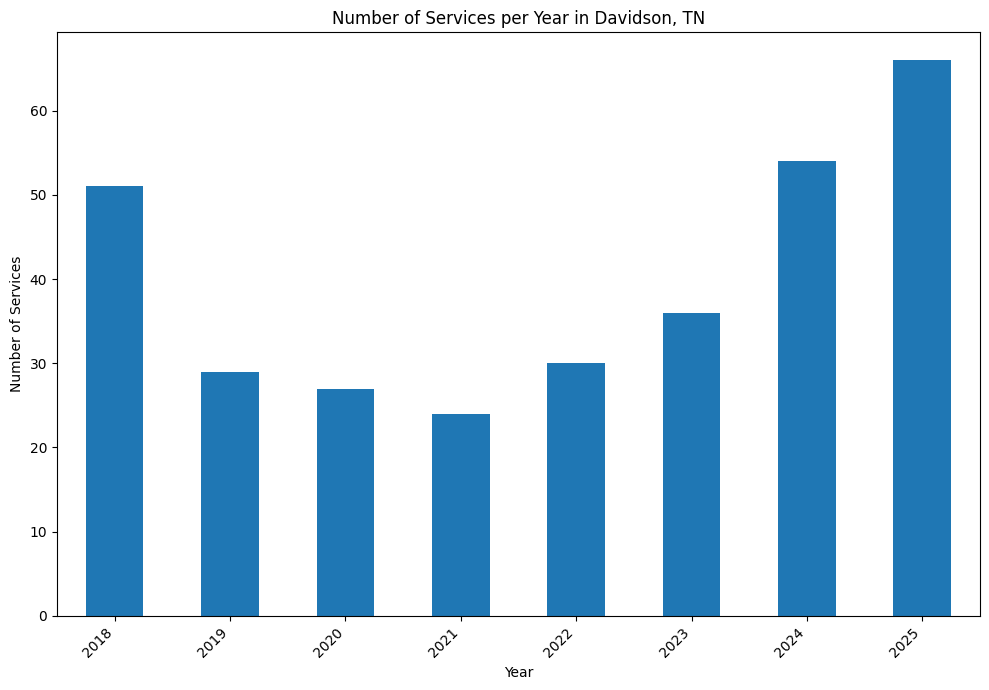

In [114]:
plt.figure(figsize=(10, 7))
services_by_year_rows.plot(kind='bar')
plt.title('Number of Services per Year in Davidson, TN')
plt.xlabel('Year')
plt.ylabel('Number of Services')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#Amount of Projects Costs by Davidson, TN

In [115]:
service_app = pd.DataFrame({
    'ID': [1, 2, 3, 4],
    'ZipCode': ['37201', '90001', '10001', '73301'],
    'State': ['TN', 'CA', 'NY', 'TX']
})

In [116]:
merged = pd.merge(df_project_cost, df_ServiceApp, left_on='Service_Application',  right_on='ID', right_index=True, how='inner')

In [117]:
result = merged[['Service_Application', 'Zip']]
print(result)

                Service_Application      Zip
Id                                          
project_cost_0      service_app_161  37218.0
project_cost_1      service_app_161  37218.0
project_cost_2      service_app_101  37218.0
project_cost_3      service_app_235  37218.0
project_cost_4      service_app_235  37218.0
project_cost_5      service_app_263  37207.0
project_cost_6      service_app_263  37207.0
project_cost_7      service_app_244  37207.0
project_cost_8      service_app_244  37207.0
project_cost_9      service_app_239  37218.0
project_cost_10     service_app_239  37218.0
project_cost_11     service_app_197  37207.0
project_cost_12     service_app_197  37207.0
project_cost_13     service_app_197  37207.0
project_cost_14     service_app_197  37207.0
project_cost_15     service_app_248  37218.0
project_cost_16     service_app_248  37218.0
project_cost_17     service_app_248  37218.0
project_cost_18     service_app_248  37218.0
project_cost_19     service_app_318  37207.0
project_co

In [118]:
# Select the desired columns including 'Project' and 'Amount'
result_df = merged[['Zip', 'CreatedDate_x', 'Service_Application', 'Amount', 'Project']]

# Define the list of zip codes to filter by
zip_codes_filter = [37013, 37042, 37043, 37064, 37072, 37076, 37115, 37189, 37204, 37206, 37207, 37208, 37209, 37210, 37211, 37214, 37216, 37217, 37218]

# Filter the result_df by the specified zip codes
filtered_result_df = result_df[result_df['Zip'].isin(zip_codes_filter)].copy()

# Convert 'CreatedDate_x' to datetime objects and set it as the index
filtered_result_df['CreatedDate_x'] = pd.to_datetime(filtered_result_df['CreatedDate_x'])
filtered_result_df = filtered_result_df.set_index('CreatedDate_x')

# Display the filtered result
display(filtered_result_df)

,Zip,Service_Application,Amount,Project
CreatedDate_x,,,,
2022-12-05 17:38:42,37218.0,service_app_161,5000.00,project_0
2022-12-05 17:40:38,37218.0,service_app_161,500.00,project_0
2023-01-30 20:40:30,37218.0,service_app_101,38000.00,project_1
2025-02-11 16:38:46,37218.0,service_app_235,1214.61,project_2
2025-02-11 16:41:54,37218.0,service_app_235,3000.00,project_2
2025-02-11 17:00:17,37207.0,service_app_263,12680.00,project_3
2025-02-11 18:16:11,37207.0,service_app_263,12680.00,project_3
2025-02-19 21:49:35,37207.0,service_app_244,350.00,project_4
2025-02-19 21:55:21,37207.0,service_app_244,13075.00,project_4


In [119]:
unique_id_count = filtered_result_df['Service_Application'].nunique()
print("Number of unique Service_application IDs:", unique_id_count)

Number of unique Service_application IDs: 31


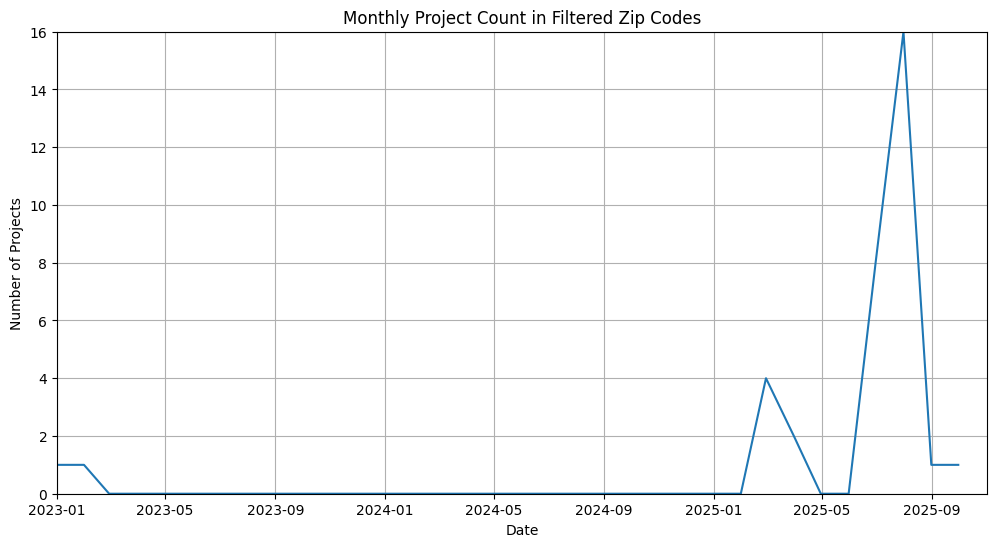

In [120]:
import matplotlib.ticker as ticker

# Visualize the monthly project count
plt.figure(figsize=(12, 6))
plt.plot(monthly_project_count.index, monthly_project_count.values)
plt.title('Monthly Project Count in Filtered Zip Codes')
plt.xlabel('Date')
plt.ylabel('Number of Projects')
plt.grid(True)

# Adjust x and y axis limits for better visualization
plt.xlim(pd.to_datetime('2023-01'), pd.to_datetime('2025-11')) # Set x-limits to the specified date range
plt.ylim(0, 16) # Set y-limits from 0 to 10

# Set y-axis ticks to show whole numbers
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()

In [121]:
# Aggregate monthly project costs
monthly_project_cost = filtered_result_df.resample('ME')['Amount'].sum()

# Display the monthly project cost
display(monthly_project_cost)

,Amount
CreatedDate_x,
2022-12-31,5500.00
2023-01-31,38000.00
2023-02-28,0.00
2023-03-31,0.00
2023-04-30,0.00
2023-05-31,0.00
2023-06-30,0.00
2023-07-31,0.00
2023-08-31,0.00


In [122]:
# Resample by month and count the number of unique projects
monthly_project_count = filtered_result_df.resample('ME')['Project'].nunique()

# Display the monthly project count
display(monthly_project_count)

,Project
CreatedDate_x,
2022-12-31,1
2023-01-31,1
2023-02-28,0
2023-03-31,0
2023-04-30,0
2023-05-31,0
2023-06-30,0
2023-07-31,0
2023-08-31,0


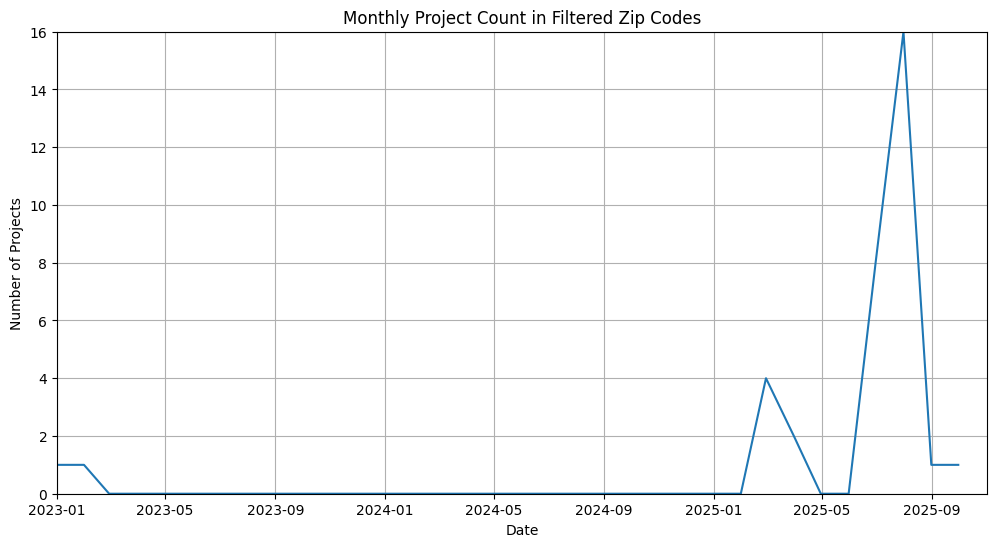

In [123]:
import matplotlib.ticker as ticker

# Visualize the monthly project count
plt.figure(figsize=(12, 6))
plt.plot(monthly_project_count.index, monthly_project_count.values)
plt.title('Monthly Project Count in Filtered Zip Codes')
plt.xlabel('Date')
plt.ylabel('Number of Projects')
plt.grid(True)

# Adjust x and y axis limits for better visualization
plt.xlim(pd.to_datetime('2023-01'), pd.to_datetime('2025-11')) # Set x-limits to the specified date range
plt.ylim(0, 16) # Set y-limits from 0 to 10

# Set y-axis ticks to show whole numbers
plt.gca().yaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()

In [124]:
#Initial Updates
service_app = pd.read_csv('https://raw.githubusercontent.com/YearningAsian/DGIHackathon2025/refs/heads/main/data/service_app.csv')
income_data = pd.read_csv('https://raw.githubusercontent.com/YearningAsian/DGIHackathon2025/refs/heads/main/data/IRSIncomeByZipCode.csv')
repair_data = pd.read_csv('https://raw.githubusercontent.com/YearningAsian/DGIHackathon2025/refs/heads/main/data/repairs.csv')
project_data = pd.read_csv('https://raw.githubusercontent.com/YearningAsian/DGIHackathon2025/refs/heads/main/data/project_cost.csv')

income_data.rename(columns={'ZIPCODE': 'Zip'}, inplace=True)

service_app.rename(columns={'Id': 'ID'}, inplace=True)
repair_data.rename(columns={'Service_Application': 'ID'}, inplace=True)
project_data.rename(columns={'Service_Application': 'ID'}, inplace=True)

#service_income = pd.merge(service_app, income_data, on='Zip', how='left')
service_repair = pd.merge(service_app, repair_data, on='ID', how='inner')

service_project_repair = pd.merge(service_repair, project_data, on='ID', how='inner')

#Making difference between starting and end score
service_project_repair['Housing_Score_Difference'] = service_project_repair['Post_Healthy_Housing_Score'] - service_project_repair['Pre_Healthy_Housing_Score']

In [125]:
import plotly.express as px

# Create an interactive scatter plot
fig = px.scatter(service_project_repair,
                 x='Housing_Score_Difference',
                 y='Amount',
                 color='Repair_Area',
                 hover_name='Repair_Area', # Show Repair_Area on hover
                 title='Repair Amount vs. Housing Score Difference by Repair Area')

# Display the plot
fig.show()